<a href="https://colab.research.google.com/github/santhosh201cali/fmml2021/blob/main/Lab1_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [7]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


In [ ]:
import 

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [17]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('ga') 
ga1 = wikipedia.page(topic1).content
ga2 = wikipedia.page(topic2).content
wikipedia.set_lang('ru')
ru1 = wikipedia.page(topic1).content
ru2 = wikipedia.page(topic2).content

This is what the text looks like:

In [18]:
ga2

'Chraol an seachtú heipeasóid déag, "Bart Gets an Elephant", den cúigiú sraith The Simpsons ar an 31 Márta 1994. Scríobh John Swartzwelder an eipeasóid seo. D\'fhéach 17.0 milliún duine ar an eipeasóid.\n\n\n== Plota ==\n\n\n== Táirgeadh ==\n\n\n== Tagairtí =='

In [19]:
ru2

'Elephant — четвёртый студийный альбом группы The White Stripes, вышедший в 2003 году под лейблом V2 Records.\nАльбом получил признание большинства музыкальных критиков, а также стал первым большим коммерческим успехом для группы относительно их предыдущих работ. Elephant был дважды номинирован на премию Грэмми в категориях: «Лучший альбом года» и «Лучший альтернативный альбом» в 2004 году.\nГодами позже альбом стал часто признаваться как лучшая работа The White Stripes и одной из лучших в 2000-х годах соответственно; журнал Rolling Stone включил альбом в свой список «500 величайших альбомов всех времён», поставив его на 390-ю строчку и на 5-ю в списке лучших альбомов десятилетия. 20 апреля 2013 года независимый лейбл Third Man Records организовал ограниченный выпуск чёрно-бело-красного издания альбома на виниле в честь десятилетия с момента его первого выпуска. Переиздание было представлено в день музыкального магазина.\n\n\n== О создании ==\n\n\n=== Запись ===\nElephant является четв

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [26]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', ' ', text) # only keep characters
  return text

In [28]:
ga1 = cleanup(ga1)
ga2 = cleanup(ga2)
ru1= cleanup(ru1)
ru2 = cleanup(ru2)

In [29]:
print(ga1 )

is rick and morty an tsraith bheoite mheirice nach is fadsaola riamh craoladh an ch ad eipeas id ar nollaig ar ghr as n adult swim is liosta na gcarachtar seo pr omhcharachtair rick sanchez guthaithe ag justin roiland mortimer morty smith sr guthaithe ag justin roiland beth smith n e sanchez guthaithe ag sarah chalke jerry smith guthaithe ag chris parnell summer smith guthaithe ag spencer grammer carachtair t naisteach dalta agus foirne harry herpson high school jessica guthaithe ag kari wahlgren principal gene vagina guthaithe ag phil hendrie mr goldenfold guthaithe ag brandon johnson coach feratu brad guthaithe ag echo kellum tammy guthaithe ag cassie steele ethan guthaithe ag daniel benson nancy guthaithe ag aislinn paul toby matthews guthaithe ag alex hirsch frank palicky guthaithe ag ryan ridley mc haps guthaithe ag dan harmon tricia lodge leagain eile na pr omhcharachtair the trans dimensional council of ricks doofus rick evil rick evil morty cronenberg rick and morty tiny rick a

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [30]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

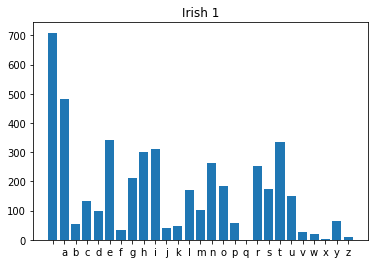

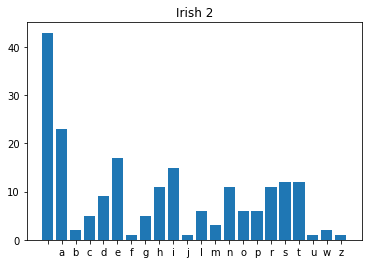

In [34]:
unigram_ga1 = Counter(ngrams(ga1,1))
plothistogram(unigram_ga1)
plt.title('Irish 1')
plt.show()
unigram_eng2 = Counter(ngrams(ga2,1))
plothistogram(unigram_eng2)
plt.title('Irish 2')
plt.show()

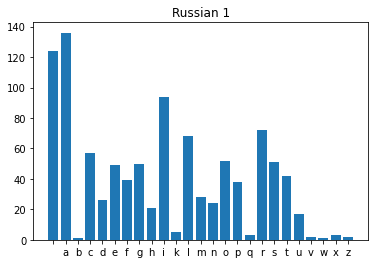

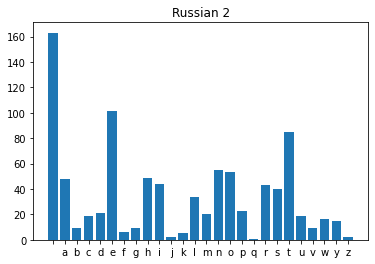

In [36]:
unigram_ru1 = Counter(ngrams(ru1,1))
plothistogram(unigram_ru1)
plt.title('Russian 1')
plt.show()
unigram_ru2 = Counter(ngrams(ru2,1))
plothistogram(unigram_ru2)
plt.title('Russian 2')
plt.show()





We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

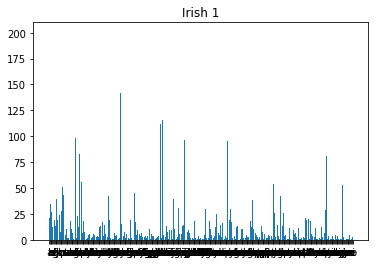

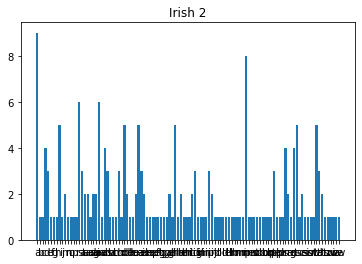

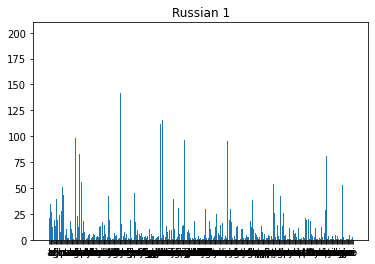

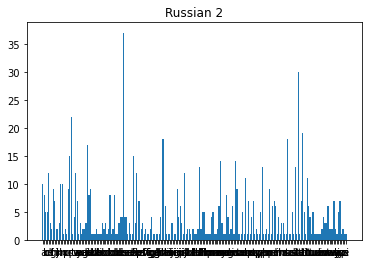

In [38]:
bigram_ga1 = Counter(ngrams(ga1,2)) # bigrams
plothistogram(bigram_ga1)
plt.title('Irish 1')
plt.show()

bigram_ga2 = Counter(ngrams(ga2,2))
plothistogram(bigram_ga2)
plt.title('Irish 2')
plt.show()

bigram_ru1 = Counter(ngrams(ru1,2))
plothistogram(bigram_ga1)
plt.title('Russian 1')
plt.show()

bigram_ru2 = Counter(ngrams(ru2,2))
plothistogram(bigram_ru2)
plt.title('Russian 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [39]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

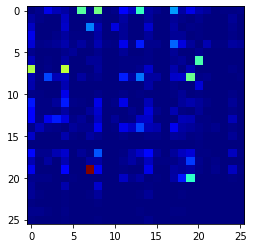

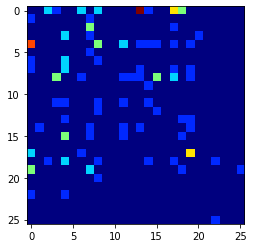

In [57]:
biga1 = plotbihistogram(bigram_ga1)
plt.show()
biga2 = plotbihistogram(bigram_ga2)

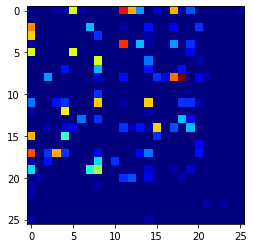

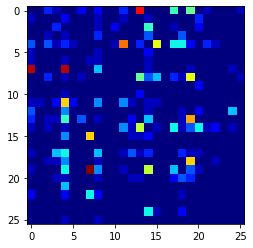

In [55]:
biru1 = plotbihistogram(bigram_ru1)
plt.show()
biru2 = plotbihistogram(bigram_ru2)

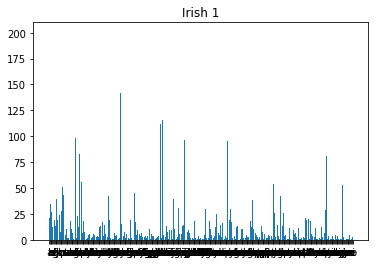

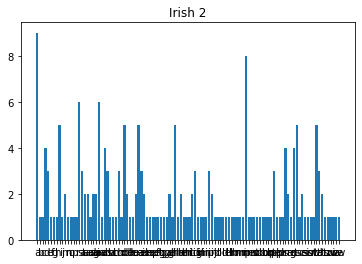

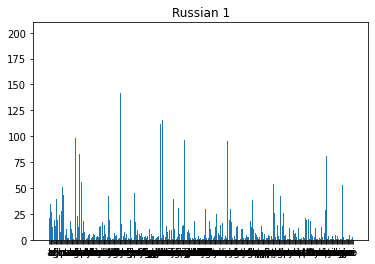

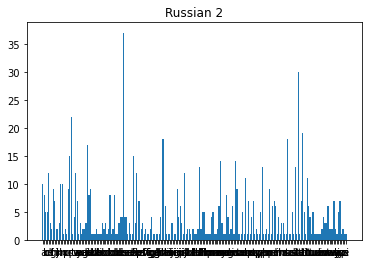

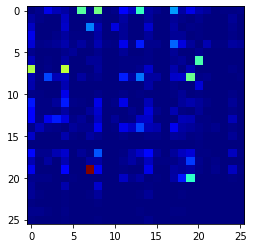

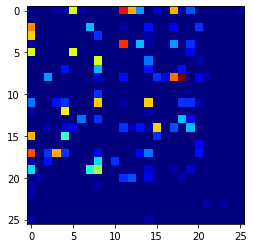

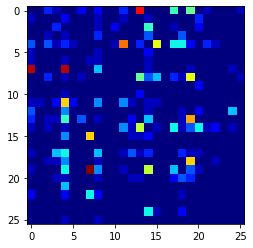

In [59]:
trigram_ga1 = Counter(ngrams(ga1,2)) # trigrams
plothistogram(bigram_ga1)
plt.title('Irish 1')
plt.show()

trigram_ga2 = Counter(ngrams(ga2,2))
plothistogram(bigram_ga2)
plt.title('Irish 2')
plt.show()

trigram_ru1 = Counter(ngrams(ru1,2))
plothistogram(bigram_ga1)
plt.title('Russian 1')
plt.show()

trigram_ru2 = Counter(ngrams(ru2,2))
plothistogram(bigram_ru2)
plt.title('Russian 2')
plt.show()


tiga1 = plotbihistogram(trigram_ga1)
plt.show()
tiga2 = plotbihistogram(trigram_ga2)
biru1 = plotbihistogram(trigram_ru1)
plt.show()
tiru2 = plotbihistogram(trigram_ru2)

Let us look at the top 10 ngrams for each text. 

In [52]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(birueq, n=10):
  f = birueq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(birueq, n=10):
  f = tirueq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [56]:
print('\nIrish 1:')
ShowTopN(biga1)
print('\nIrish 2:')
ShowTopN(biga2)
print('\nRussian 1:')
ShowTopN(biru1)
print('\nRussian2:')
ShowTopN(biru2)


Irish 1:
('t', 'h') : 200.0
('h', 'e') : 116.0
('h', 'a') : 112.0
('a', 'i') : 98.0
('i', 't') : 96.0
('a', 'g') : 91.0
('g', 'u') : 88.0
('a', 'n') : 83.0
('u', 't') : 81.0
('a', 'r') : 56.0

Irish 2:
('a', 'n') : 6.0
('e', 'a') : 5.0
('r', 't') : 4.0
('a', 'r') : 4.0
('i', 'd') : 3.0
('t', 'a') : 3.0
('a', 's') : 3.0
('c', 'h') : 3.0
('e', 'i') : 3.0
('i', 'p') : 3.0

Russian 1:
('i', 's') : 29.0
('a', 'l') : 26.0
('e', 'l') : 25.0
('r', 'a') : 24.0
('i', 'r') : 23.0
('c', 'a') : 22.0
('a', 'r') : 21.0
('r', 'd') : 21.0
('p', 'a') : 21.0
('a', 'm') : 21.0

Russian2:
('t', 'h') : 19.0
('h', 'e') : 18.0
('h', 'a') : 18.0
('a', 'n') : 17.0
('e', 'l') : 15.0
('n', 't') : 14.0
('p', 'h') : 13.0
('s', 't') : 13.0
('l', 'e') : 13.0
('e', 'p') : 12.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

2)no it can't process the different topic with different sources .

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [60]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [63]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

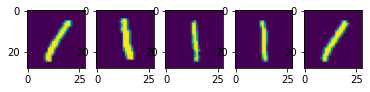

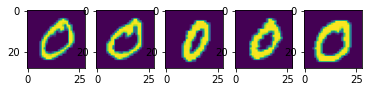

In [64]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [65]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

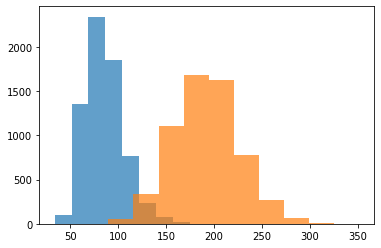

In [66]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [68]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

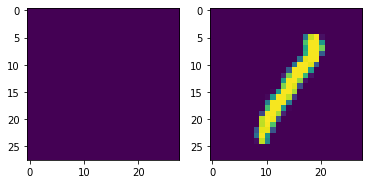

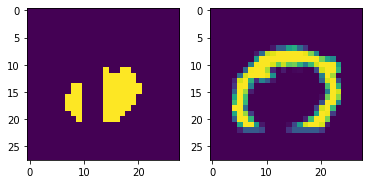

In [69]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

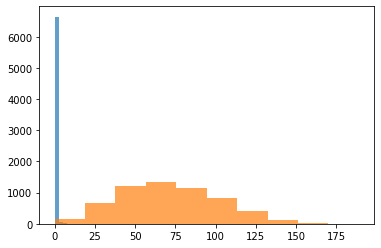

In [70]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [71]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


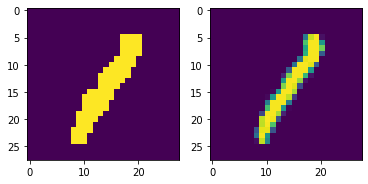

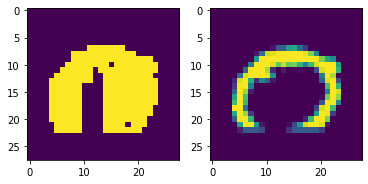

In [72]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

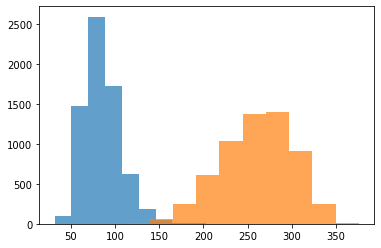

In [73]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [74]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

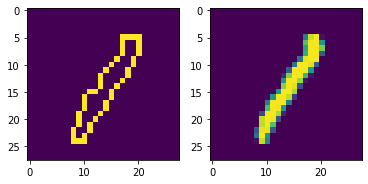

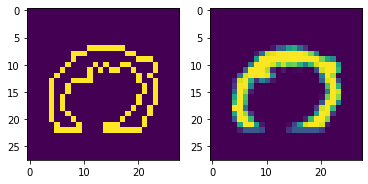

In [75]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

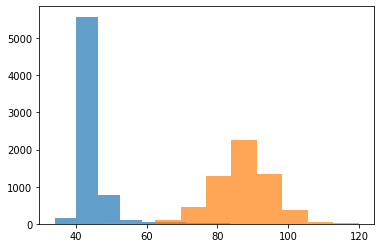

In [76]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

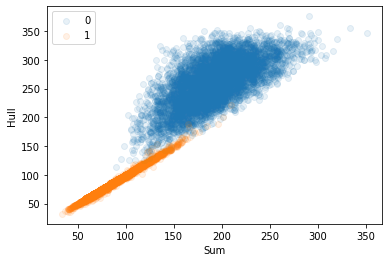

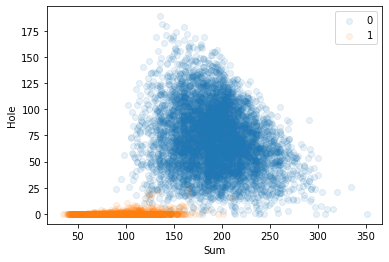

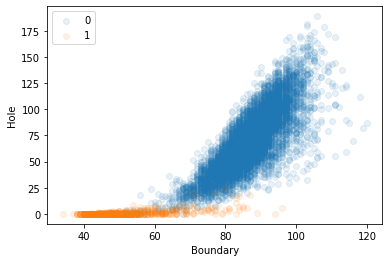

In [77]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [78]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1.)0,1 are the best combinations feature

4.)yes

2.)we can add more features or than four ex 0,1,2,3

3.)may be.

5.) may be possible ( boundaries will increases)